### imports

In [1]:
from regional import one, many
from showit import image
from numpy import zeros, random, asarray, round, where, ones
from scipy.ndimage.morphology import binary_closing, binary_opening, binary_fill_holes, binary_dilation

### plotting

In [2]:
%matplotlib inline

### parameters

In [3]:
dims = [100,200]
margin = 20
n = 20

### create random polygons

In [4]:
def topoly(c):
    tmp = zeros(dims)
    coords = asarray([c[0] + random.randn(32) * 3, c[1] + random.randn(32) * 3]).astype('int')
    tmp[coords.tolist()] = 1
    tmp = binary_dilation(tmp, ones((3, 3)))
    tmp = binary_closing(tmp, ones((7, 7)))
    return asarray(where(tmp)).T

xcenters = (dims[0] - margin) * random.random_sample(n) + margin/2
ycenters = (dims[1] - margin) * random.random_sample(n) + margin/2
centers = zip(xcenters, ycenters)

### generate regions

In [5]:
regions = many([one(topoly(c)) for c in centers])

### show one

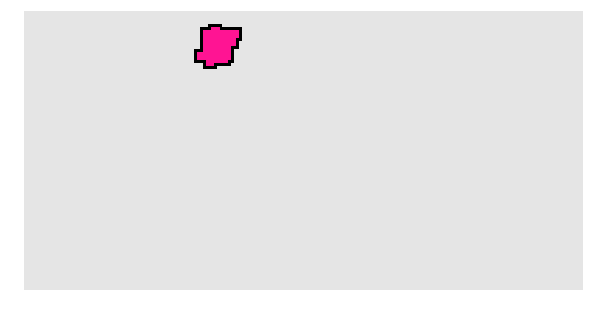

In [6]:
image(regions[0].mask(dims=dims, background=[0.9,0.9,0.9]), size=10);

### show all

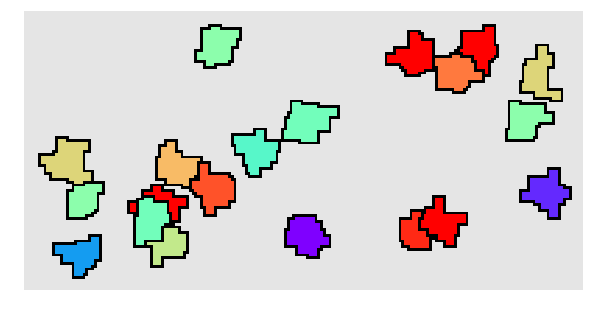

In [7]:
v = random.rand(n)
v = v - v.min()
v = v / v.max()
image(regions.mask(dims=dims, value=v, cmap='rainbow', background=[0.9, 0.9, 0.9]), size=10);